# Carga de librerías

Cargamos las librerías numpy, matplotlib y sklearn.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import log_loss, accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from datetime import datetime

# Carga de datos

Cargamos los datos eliminando las columnas de Clouds 9am y 3pm, Sunshine y Evaporation ya que no las considerabamos relevantes. Además nos saltamos las 2
primeras columnas ya que eran no númericas.

In [0]:
filename = 'weatherAUS.csv'

data = np.loadtxt(filename, dtype=float, delimiter=',', skiprows=1, usecols=(2,3,4,5,6,7,8,9,10,11))
#print(data)
#for i in range(20):
 # for j in range(10):
  #  data[i][j]
print("MinTemp\t\tMaxTemp\t\twindDir\t\tWindGustSpeed\tWindSpeed3pm\tHumidity3pm\tPressure3pm\tTemp3pm\t\tRainToday\tRainTomorrow\t")
for i in range(20):
  for j in range(len(data[i])):
    print(data[i][j], end='\t\t')
  print()


MinTemp		MaxTemp		windDir		WindGustSpeed	WindSpeed3pm	Humidity3pm	Pressure3pm	Temp3pm		RainToday	RainTomorrow	
13.4		22.9		3.0		44.0		24.0		22.0		1007.1		21.8		0.0		0.0		
7.4		25.1		6.0		44.0		22.0		25.0		1007.8		24.3		0.0		0.0		
12.9		25.7		8.0		46.0		26.0		30.0		1008.7		23.2		0.0		0.0		
9.2		28.0		5.0		24.0		9.0		16.0		1012.8		26.5		0.0		0.0		
17.5		32.3		3.0		41.0		20.0		33.0		1006.0		29.7		0.0		0.0		
14.6		29.7		6.0		56.0		24.0		23.0		1005.4		28.9		0.0		0.0		
14.3		25.0		3.0		50.0		24.0		19.0		1008.2		24.6		0.0		0.0		
7.7		26.7		3.0		35.0		17.0		19.0		1010.1		25.5		0.0		0.0		
9.7		31.9		6.0		80.0		28.0		9.0		1003.6		30.2		0.0		1.0		
13.1		30.1		3.0		28.0		11.0		27.0		1005.7		28.2		1.0		0.0		
13.4		30.4		1.0		30.0		6.0		22.0		1008.7		28.8		0.0		1.0		
15.9		21.7		5.0		31.0		13.0		91.0		1004.2		17.0		1.0		1.0		
15.9		18.6		3.0		61.0		28.0		93.0		993.0		15.8		1.0		1.0		
12.6		21.0		8.0		44.0		20.0		43.0		1001.8		19.8		1.0		0.0		
14.1		20.9		5.0		22.0		9.0		82.0		1010.4		18.1		0.0		1.0	

# Preprocesado de datos

Se realiza una partición de los datos, reservando el 50% de los datos del primer conjunto para entrenamiento, el otro 50% para validación y todos los datos cargados del segundo conjunto para test. 
Las entradas (input) contiene todas las columnas excepto la última ya que esta es la que predice si llueve al dia siguiente.
El target contiene la última columna que indica si llovió.

In [0]:
train_size = 0.5
test_size = 1 - train_size
#input tiene todas las columnas menos la última que es la que predice si llueve
patterns_input = data[:,:-1]
#target tiene solamente la columna de si llovió
patterns_target = data[:, -1]
input_train, input_valid, target_train, target_valid = train_test_split(patterns_input, patterns_target, train_size=train_size, test_size=test_size, random_state=0, shuffle=True)
print("<Conjunto_Input_Entrenamiento>.shape = ",input_train.shape)
print("<Conjunto_ValidaciónOutput_Entrenamiento>.shape = ",target_train.shape)

input_test, input_valid, target_test, target_valid = train_test_split(input_valid, target_valid, train_size=train_size,test_size=test_size, random_state=0, shuffle=True)

print("<Conjunto_Input_Validación>.shape = ",input_valid.shape)
print("<Conjunto_ValidaciónOutput_Validación>.shape = ",target_valid.shape)
print("<Conjunto_Input_Test>.shape = ",input_test.shape)
print("<Conjunto_ValidaciónOutput_Test>.shape = ",target_test.shape)

<Conjunto_Input_Entrenamiento>.shape =  (59975, 9)
<Conjunto_ValidaciónOutput_Entrenamiento>.shape =  (59975,)
<Conjunto_Input_Validación>.shape =  (29988, 9)
<Conjunto_ValidaciónOutput_Validación>.shape =  (29988,)
<Conjunto_Input_Test>.shape =  (29987, 9)
<Conjunto_ValidaciónOutput_Test>.shape =  (29987,)


# Perceptor Simple

Entrenamos el modelo del Perceptrón Simple con 120 iteraciones, que nos dará la medida de hasta que punto el problema es separable linelamente.
La precisión del conjunto de entrenamiento es del 83.051% y el conjunto de validación es del 83.507%

In [0]:
#Resultados perceptor simple
max_iter = 120
per = Perceptron(max_iter=max_iter, shuffle=False, random_state=0, verbose=True)
per.fit(input_train, target_train)
predict_train = per.predict(input_train)
predict_valid = per.predict(input_valid)
print("Train accuracy: %.3f%%" % (accuracy_score(target_train, predict_train) * 100))
print("Valid accuracy: %.3f%%" % (accuracy_score(target_valid, predict_valid) * 100))

-- Epoch 1
Norm: 32078.64, NNZs: 9, Bias: 20.000000, T: 59975, Avg. loss: 120957.423089
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 35409.29, NNZs: 9, Bias: 39.000000, T: 119950, Avg. loss: 119099.845422
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 37812.96, NNZs: 9, Bias: 56.000000, T: 179925, Avg. loss: 117834.755736
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 38900.30, NNZs: 9, Bias: 73.000000, T: 239900, Avg. loss: 118177.940188
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 40348.37, NNZs: 9, Bias: 89.000000, T: 299875, Avg. loss: 118419.248699
Total training time: 0.02 seconds.
-- Epoch 6
Norm: 40964.65, NNZs: 9, Bias: 105.000000, T: 359850, Avg. loss: 117945.011203
Total training time: 0.02 seconds.
-- Epoch 7
Norm: 41747.52, NNZs: 9, Bias: 121.000000, T: 419825, Avg. loss: 118323.851771
Total training time: 0.02 seconds.
-- Epoch 8
Norm: 41698.32, NNZs: 9, Bias: 137.000000, T: 479800, Avg. loss: 119009.422087
Total training time: 0.02 seconds.
Conver

# Perceptrón Multicapa

Probamos usar un perceptrón multicapa para intentar alcanzar una mayor precisión de la predicción de la lluvia.

In [0]:
#Multicapa
def MLP_train_valid(mlp, input_train, target_train, input_valid, target_valid, max_iter, valid_cycles, verbose):
   """
   Train and valid MLP every valid_cycles iterations
   """
   classes  = np.unique(target_train)
   loss_valid = []
   for i in range(int(max_iter/valid_cycles)):
       for j in range(valid_cycles):
           out = mlp.partial_fit(input_train, target_train, classes)
           # Calculate loss function of valid set
       last_lost_valid = log_loss(target_valid, mlp.predict_proba(input_valid))
       loss_valid.append(last_lost_valid)
       if verbose:
           print("Iteration %d, train loss = %.8f, valid loss = %.8f" %
                 (mlp.n_iter_, mlp.loss_, last_lost_valid))
       if early_stopping and (i > 0) and (last_lost_valid > loss_valid[-2]): # Early stopping
           if verbose:
               print("Early stopping: Validation score did not improve")
           break
   if verbose: print(out)
   
   if verbose:
       # Visualizing the Cost Function Trajectory
       # (https://sdsawtelle.github.io/blog/output/week4-andrew-ng-machine-learning-with-python.html#Visualizing-the-Cost-Function-Trajectory)
       print("Visualizing the Cost Function Trajectory")
       plt.plot(range(1, len(mlp.loss_curve_)+1), mlp.loss_curve_, label='Train loss')
       plt.plot(range(valid_cycles,len(loss_valid)*valid_cycles+valid_cycles,valid_cycles), loss_valid, '-o', label='Valid loss')
       plt.xlabel('number of iterations')
       plt.ylabel('loss function')
       plt.legend(loc='upper right')
       plt.show()

Realizamos un entrenamiento con un MLP de una capa oculta de 10 neuronas, un ratio de aprendizaje de 0.001, durante un máximo 300 iteraciones, validando cada 5 ciclos.

Iteration 5, train loss = 0.37945327, valid loss = 0.37121617
Iteration 10, train loss = 0.37502861, valid loss = 0.36607718
Iteration 15, train loss = 0.37447348, valid loss = 0.36508281
Iteration 20, train loss = 0.37412086, valid loss = 0.36456711
Iteration 25, train loss = 0.37384847, valid loss = 0.36420887
Iteration 30, train loss = 0.37363064, valid loss = 0.36393453
Iteration 35, train loss = 0.37345402, valid loss = 0.36371794
Iteration 40, train loss = 0.37330965, valid loss = 0.36354563
Iteration 45, train loss = 0.37319086, valid loss = 0.36340896
Iteration 50, train loss = 0.37309252, valid loss = 0.36330169
Iteration 55, train loss = 0.37301059, valid loss = 0.36321911
Iteration 60, train loss = 0.37294187, valid loss = 0.36315759
Iteration 65, train loss = 0.37288380, valid loss = 0.36311427
Iteration 70, train loss = 0.37283434, valid loss = 0.36308696
Iteration 75, train loss = 0.37279187, valid loss = 0.36307399
Iteration 80, train loss = 0.37275508, valid loss = 0.36

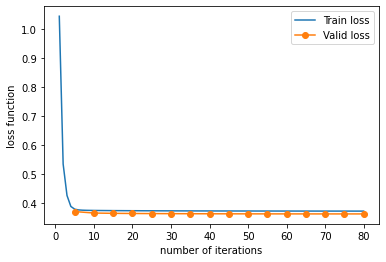

In [0]:
max_iter = 300
n_hidden = 10
learning_rate_init = 0.001
valid_cycles = 5
early_stopping = True
mlp = MLPClassifier(hidden_layer_sizes=(n_hidden,), learning_rate_init=learning_rate_init, shuffle=False, random_state=0, verbose=False)
MLP_train_valid(mlp, input_train, target_train, input_valid, target_valid, max_iter, valid_cycles, True)

In [0]:
predict_train = mlp.predict(input_train)
predict_valid = mlp.predict(input_valid)
print("Train accuracy: %.3f%%" % (accuracy_score(target_train, predict_train) * 100))
print("Valid accuracy: %.3f%%" % (accuracy_score(target_valid, predict_valid) * 100))
print("Train confusion matrix:")
print(confusion_matrix(target_train, predict_train))
print("Valid confusion matrix:")
print(confusion_matrix(target_valid, predict_valid))
print("Train classification report:")
print(classification_report(target_train, predict_train))
print("Valid classification report:")
print(classification_report(target_valid, predict_valid))

Train accuracy: 84.485%
Valid accuracy: 84.851%
Train confusion matrix:
[[43911  2826]
 [ 6479  6759]]
Valid confusion matrix:
[[22101  1425]
 [ 3118  3344]]
Train classification report:
              precision    recall  f1-score   support

         0.0       0.87      0.94      0.90     46737
         1.0       0.71      0.51      0.59     13238

    accuracy                           0.84     59975
   macro avg       0.79      0.73      0.75     59975
weighted avg       0.83      0.84      0.84     59975

Valid classification report:
              precision    recall  f1-score   support

         0.0       0.88      0.94      0.91     23526
         1.0       0.70      0.52      0.60      6462

    accuracy                           0.85     29988
   macro avg       0.79      0.73      0.75     29988
weighted avg       0.84      0.85      0.84     29988



Se observa que la precisión al usar el método de multicapa mejora respecto al perceptrón simple aproximadamente un 1'4%

# Optimización ratio aprendizaje

Para acelerar la convergencia de los MLP se busca un ratio de aprendizaje más adecuado, probando con distintos valores entre 0.001 y 0.1, utilizando la función de activación por defecto ReLU.
Se visualizan las gráficas de la evolución del error a lo largo de los ciclos para los distintos ratios de aprendizajes estudiados.

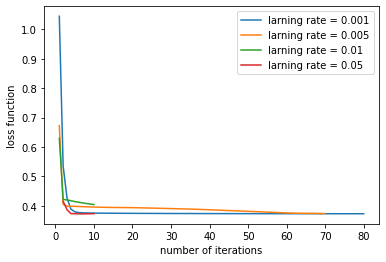

In [0]:
#Optimización ratio aprendizaje
tests_learning_rate_init = [0.001, 0.005, 0.01, 0.05]
activation = 'relu'
random_state = 0
now = datetime.now()
loss_curves =  []
for lr in tests_learning_rate_init:
   mlp = MLPClassifier(hidden_layer_sizes=(n_hidden,), learning_rate_init=lr, shuffle=False, random_state=random_state, verbose=False, activation=activation)
   MLP_train_valid(mlp, input_train, target_train, input_valid, target_valid, max_iter, valid_cycles, False)
   loss_curves.append(mlp.loss_curve_)
for (lr, loss_curve) in zip(tests_learning_rate_init, loss_curves):
   plt.plot(range(1, len(loss_curve)+1), loss_curve, label='larning rate = ' + str(lr))
plt.xlabel('number of iterations')
plt.ylabel('loss function')
plt.legend(loc='upper right')
plt.show()

Para nuestro conjunto de datos vemos que el mejor ratio de aprendizaje es 0.001

# Optimización arquitectura

Para tratar de mejorar los resultados de los MLP se busca el número de neuronas ocultas más adecuado, probando con distintos valores entre 10 y 190, repitiendo para cada configuración 10 veces y quedándose con aquella de mayor precisión en el conjunto de validación

In [0]:
from datetime import datetime

tests_n_hidden = [10, 30, 50, 70, 90, 110, 130, 150]
n_reps = 10
activation = 'relu'
# activation = 'logistic'
learning_rate_init = 0.001
now = datetime.now()
best_mlp = []
best_acc = 0.0
accs_train = []
accs_valid = []
for n_hidden in tests_n_hidden:
   max_acc_train = max_acc_valid = 0.0
   for random_state in range(n_reps):
       mlp = MLPClassifier(hidden_layer_sizes=(n_hidden,), learning_rate_init=learning_rate_init, shuffle=False, random_state=random_state, verbose=False, activation=activation)
       MLP_train_valid(mlp, input_train, target_train, input_valid, target_valid, max_iter, valid_cycles, False)
       
       acc_train = accuracy_score(target_train, mlp.predict(input_train))
       acc_valid = accuracy_score(target_valid,mlp.predict(input_valid))
       print("Seed = %d, train acc = %.8f, valid acc = %.8f, iterations = %d" % (random_state, acc_train, acc_valid, len(mlp.loss_curve_)))
       if (max_acc_valid < acc_valid):
           max_acc_valid = acc_valid
           max_acc_train = acc_train
           if (acc_valid > best_acc):
               best_acc = acc_valid
               best_mlp = mlp
   accs_train.append(max_acc_train)
   accs_valid.append(max_acc_valid)
   print("Number hidden units = %i, train acc = %.8f, max valid acc = %.8f" % (n_hidden, max_acc_train, max_acc_valid))
print("Number of seconds for training: %d" % (datetime.now() - now).total_seconds())
print("Best MLP valid accuracy: %.8f%%" % (best_acc * 100))
print("Best MLP: ", best_mlp)

Seed = 0, train acc = 0.84485202, valid acc = 0.84850607, iterations = 80
Seed = 1, train acc = 0.84623593, valid acc = 0.84983994, iterations = 20
Seed = 2, train acc = 0.84176740, valid acc = 0.84390423, iterations = 15
Seed = 3, train acc = 0.83618174, valid acc = 0.83756836, iterations = 10
Seed = 4, train acc = 0.84546895, valid acc = 0.85050687, iterations = 50
Seed = 5, train acc = 0.83866611, valid acc = 0.84403762, iterations = 255
Seed = 6, train acc = 0.84058358, valid acc = 0.84630519, iterations = 300
Seed = 7, train acc = 0.84260108, valid acc = 0.84737228, iterations = 300
Seed = 8, train acc = 0.83884952, valid acc = 0.84123649, iterations = 15
Seed = 9, train acc = 0.84168404, valid acc = 0.84403762, iterations = 10
Number hidden units = 10, train acc = 0.84546895, max valid acc = 0.85050687
Seed = 0, train acc = 0.84286786, valid acc = 0.84887288, iterations = 10
Seed = 1, train acc = 0.82837849, valid acc = 0.83259971, iterations = 10
Seed = 2, train acc = 0.83047937

Observamos que el mejor mlp consta de 70 neuronas en la capa oculta.
Se visualizan los resultados de errores obtenidos con las distintas arquitecturas estudiadas.

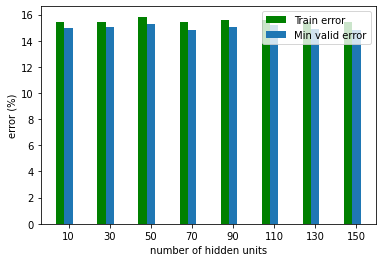

In [0]:
width = 4
plt.bar(np.array(tests_n_hidden) - width, 100 *(1- np.array(accs_train)), color='g', width=width, label='Train error')
plt.bar(np.array(tests_n_hidden), 100 *(1- np.array(accs_valid)), width=width, label='Min valid error')
plt.xlabel('number of hidden units')
plt.ylabel('error (%)')
plt.xticks(np.array(tests_n_hidden), tests_n_hidden)
plt.legend(loc='upper right')
plt.show()

#Resultados finales mejor MLP

Se calculan los resultados finales para el mejor MLP obtenido, incluido el conjunto de test

In [0]:
predict_train = best_mlp.predict(input_train)
predict_valid = best_mlp.predict(input_valid)
predict_test = best_mlp.predict(input_test)
print("Train accuracy: %.3f%%" % (accuracy_score(target_train, predict_train) * 100))
print("Valid accuracy: %.3f%%" % (accuracy_score(target_valid, predict_valid) * 100))
print("Test accuracy: %.3f%%" % (accuracy_score(target_test, predict_test) * 100))
print("Train confusion matrix:")
print(confusion_matrix(target_train, predict_train))
print("Valid confusion matrix:")
print(confusion_matrix(target_valid, predict_valid))
print("Test confusion matrix:")
print(confusion_matrix(target_test, predict_test))
print("Train classification report:")
print(classification_report(target_train, predict_train))
print("Valid classification report:")
print(classification_report(target_valid, predict_valid))
print("Test classification report:")
print(classification_report(target_test, predict_test))

Train accuracy: 84.555%
Valid accuracy: 85.167%
Test accuracy: 84.687%
Train confusion matrix:
[[45264  1473]
 [ 7790  5448]]
Valid confusion matrix:
[[22821   705]
 [ 3743  2719]]
Test confusion matrix:
[[22689   723]
 [ 3869  2706]]
Train classification report:
              precision    recall  f1-score   support

         0.0       0.85      0.97      0.91     46737
         1.0       0.79      0.41      0.54     13238

    accuracy                           0.85     59975
   macro avg       0.82      0.69      0.72     59975
weighted avg       0.84      0.85      0.83     59975

Valid classification report:
              precision    recall  f1-score   support

         0.0       0.86      0.97      0.91     23526
         1.0       0.79      0.42      0.55      6462

    accuracy                           0.85     29988
   macro avg       0.83      0.70      0.73     29988
weighted avg       0.85      0.85      0.83     29988

Test classification report:
              precision  

Tanto el conjunto de entrenamiento como el de validación ha mejorado aproximadamente un 1.5%

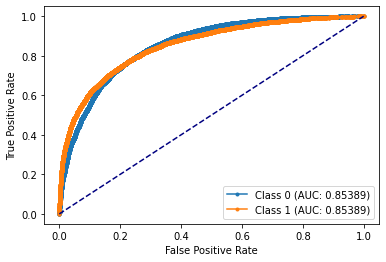

In [0]:
mlp_probs = mlp.predict_proba(input_test)
classes  = np.unique(target_train)
mlp_auc = []
mlp_fpr = []
mlp_tpr = []
for cla in classes:
  cla = int(cla)
  mlp_auc.append(roc_auc_score(target_test==cla, mlp_probs[:,cla]))
  fpr, tpr, _ = roc_curve(target_test==cla, mlp_probs[:,cla])
  mlp_fpr.append(fpr)
  mlp_tpr.append(tpr)

for cla in classes:
  cla = int(cla)
  plt.plot(mlp_fpr[cla], mlp_tpr[cla], marker='.', label='Class %d (AUC: %.5f)' % (cla, mlp_auc[cla]))

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Conclusión

Observamos que la precisión del perceptor simple es similar aunque inferior al perceptor multicapa. Esto se debe a la gran cantidad de datos que posee nuestro fichero .csv,es decir, nuestra base de datos.